# Statistical inference

- confidence intervals

- hypothesis tests

_Example_

Confidence interval for the average height of males in the students population. 

(I assume that the sample collected in the survey is representative for the student population.)

In [1]:
import pandas as pd

csv_url = "https://docs.google.com/spreadsheets/d/1H6b5mkq68MeRQyP0Cr2weCpVkzmpR0c2Oi7p147o2a0/export?format=csv"

# Read the sheet into a DataFrame
d = pd.read_csv(csv_url)

print(d.head())

   height  handedness  right_hand_span  left_hand_span  head_circ eye_colour  \
0     159        0.88             19.0            19.0       54.0       Blue   
1     160       -1.00             19.0            20.0       57.0      Green   
2     161        0.79             17.0            16.5       57.0      hazel   
3     162        0.79             16.0            16.0       57.0       gray   
4     162        0.79             16.0            16.0       54.0      Brown   

   gender  siblings  movies  soda   bedtime       fb_freq  fb_friends  \
0  Female         2     3.0   7.0  02:00:00    once a day       135.0   
1  Female         2     0.5   2.0  04:30:00             0         1.0   
2  Female         3     3.0   2.0  23:50:00   once a week       354.0   
3  Female         2     0.0   2.0  23:10:00  almost never       192.0   
4  Female         2     1.0   3.0  00:00:00         never         1.0   

                  stat_likert  
0  Neither agree nor disagree  
1              S

In [3]:
import numpy as np
mask = d['gender']=="Male"
print(np.sum(mask))
print(np.mean(d['height'][mask]))

36
181.91666666666666


(https://bookdown.org/blazej_kochanski/statistics2/ci-mean.html#templates-3)

In [8]:
import numpy as np
from scipy import stats

data = d['height'][mask]
test_result = stats.ttest_1samp(data, popmean=np.mean(data))
conf_int = test_result.confidence_interval(0.95)
print(conf_int)

ConfidenceInterval(low=np.float64(179.07845998200804), high=np.float64(184.75487335132527))


Based on our sample (with n=36 observations) we find that the 95-percent confidence interval for the population mean is (179.08; 184.75). 

In [13]:
# correlation between the height and head size in the sample:

from scipy import stats
mask2 = d['head_circ'].notna()
r = stats.pearsonr(d['height'][mask2], d['head_circ'][mask2])
print(r)

PearsonRResult(statistic=np.float64(0.5689345917702635), pvalue=np.float64(2.582305399535021e-06))


(https://bookdown.org/blazej_kochanski/statistics2/other.html)

In [15]:
import scipy.stats as stats
import numpy as np
import math as math

x = d['height'][mask2]
y = d['head_circ'][mask2]

correlation_test = stats.pearsonr(x, y)

# Confidence interval:
ci_tmp = stats.norm.interval(0.95, 
  loc=0.5*math.log((1+correlation_test[0])/(1-correlation_test[0])), 
  scale=1/((len(x)-3)**0.5))
confidence_interval = (np.exp(2*np.array(ci_tmp))-1)/(np.exp(2*np.array(ci_tmp))+1)

print('Test:\n\n', correlation_test, '\n\n Confidence interval: \n\n', confidence_interval)

print(r.confidence_interval(0.95))

Test:

 PearsonRResult(statistic=np.float64(0.5689345917702635), pvalue=np.float64(2.582305399535021e-06)) 

 Confidence interval: 

 [0.36620642 0.72010224]
ConfidenceInterval(low=np.float64(0.366206417384293), high=np.float64(0.7201022444623262))


The 95-percent confidence interval for the population correlation coefficient $\rho$ is (0.366; 0.720).

In [18]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
d['eye2'] = "Other"
d.loc[d['eye_colour']=="Brown", 'eye2'] = "Brown"
d.loc[d['eye_colour']=="Blue", 'eye2'] = "Blue"
d.loc[d['eye_colour']=="Green", 'eye2'] = "Green"
print(pd.crosstab(d['eye2'], d['gender']))
def cramers_v(x, y):
    """
    Compute Cramér's V statistic for categorical-categorical association.

    Parameters:
        x (pd.Series): Categorical variable.
        y (pd.Series): Categorical variable.

    Returns:
        float: Cramér's V value between 0 and 1.
    """
    # Create a contingency table
    cont_table = pd.crosstab(x, y)

    # Compute chi-squared statistic
    chi2 = chi2_contingency(cont_table)[0]

    # Get sample size and minimum dimension
    n = cont_table.sum().sum()
    k = min(cont_table.shape) - 1

    # Compute Cramér's V
    v = np.sqrt(chi2 / (n * k))
    return v

print(cramers_v(d['eye2'], d['gender']))

gender  Female  Male
eye2                
Blue         8    13
Brown        9    11
Green        3     9
Other        4     3
0.19245008972987526


(array([ 24., 105., 166., 208., 234., 141.,  80.,  31.,   9.,   2.]),
 array([0.0297509 , 0.09121016, 0.15266942, 0.21412868, 0.27558795,
        0.33704721, 0.39850647, 0.45996573, 0.52142499, 0.58288426,
        0.64434352]),
 <BarContainer object of 10 artists>)

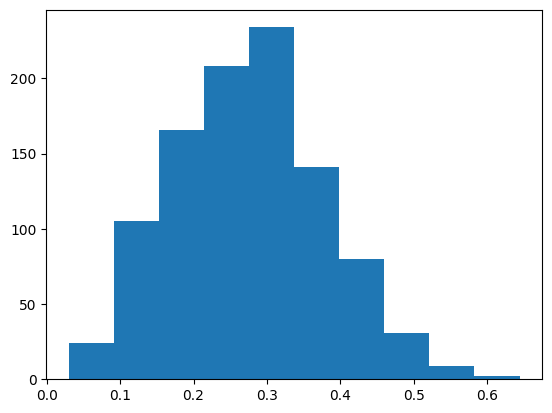

In [61]:
nsim = 1000
n=len(d['eye2'])
def sim():
    indices = np.random.choice(n, n, replace=True)
    bootstrap_sample = d.iloc[indices]
    return(cramers_v(bootstrap_sample['eye2'], bootstrap_sample['gender']))

results = [sim() for _ in range(nsim)]

import matplotlib.pyplot as plt
plt.hist(results)

In [62]:
np.quantile(results, [0.025, 0.975])

array([0.09447115, 0.48302212])